# Use titanic dataset as an exercise for categorical feature embedding
## Load data

In [21]:
%matplotlib inline

In [22]:
import pandas as pd

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [3]:
data = pd.read_csv("data/titanic_train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Identify continuous vs categorical variables

In [5]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [9]:
data.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F33            3
C22 C26        3
D              3
F2             3
E8             2
B5             2
C126           2
D20            2
B18            2
C92            2
C125           2
C124           2
C83            2
D36            2
E67            2
C123           2
B22            2
C78            2
C52            2
D17            2
B28            2
D26            2
B51 B53 B55    2
B20            2
B58 B60        2
C68            2
              ..
C46            1
D7             1
A5             1
E46            1
C103           1
D46            1
B79            1
E36            1
C95            1
A16            1
D11            1
C148           1
A32            1
B86            1
D50            1
B39            1
C85            1
A31            1
C90            1
A23            1
C128           1
C99            1
C30            1
A26            1
E10            1
C86            1
E58            1
B71           

In [10]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Could do some feature engineering to turn Cabin into deck, but that's not the point of this exercise.

In [11]:
cat_vars = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
contin_vars = ["Age", "Fare"]

In [32]:
dep = 'Survived'
use_data = data[cat_vars+contin_vars+[dep]].copy()

In [13]:
use_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived
0,3,male,1,0,S,22.0,7.2500,0
1,1,female,1,0,C,38.0,71.2833,1
2,3,female,0,0,S,26.0,7.9250,1
3,1,female,1,0,S,35.0,53.1000,1
4,3,male,0,0,S,35.0,8.0500,0


In [33]:
for v in cat_vars: use_data[v] = use_data[v].astype('category').cat.as_ordered()

In [15]:
use_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived
0,3,male,1,0,S,22.0,7.2500,0
1,1,female,1,0,C,38.0,71.2833,1
2,3,female,0,0,S,26.0,7.9250,1
3,1,female,1,0,S,35.0,53.1000,1
4,3,male,0,0,S,35.0,8.0500,0


In [17]:
use_data.Sex.dtype

CategoricalDtype(categories=['female', 'male'], ordered=True)

In [29]:
data.Fare.isna().value_counts()

False    891
Name: Fare, dtype: int64

In [30]:
data.Age.isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [34]:
for v in contin_vars:
    # Probably dont want the fillna if treating missing values properly
    use_data[v] = use_data[v].astype('float32')

In [19]:
use_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived
0,3,male,1,0,S,22.0,7.250000,0
1,1,female,1,0,C,38.0,71.283302,1
2,3,female,0,0,S,26.0,7.925000,1
3,1,female,1,0,S,35.0,53.099998,1
4,3,male,0,0,S,35.0,8.050000,0


In [111]:
df, y, nas, mapper = proc_df(use_data, 'Survived', do_scale=True)

In [36]:
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Age_na
0,3,2,2,1,3,-0.565736,-0.502445,-0.497895
1,1,1,2,1,1,0.663861,0.786845,-0.497895
2,3,1,1,1,3,-0.258337,-0.488854,-0.497895
3,1,1,2,1,3,0.433312,0.420730,-0.497895
4,3,2,1,1,3,0.433312,-0.486337,-0.497895


In [37]:
mapper

DataFrameMapper(default=False, df_out=False,
        features=[(['Age'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Fare'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Age_na'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

In [112]:
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [113]:
nas

{'Age': 28.0}

In [147]:
df.Age_na.value_counts()

-0.497895    714
 2.008457    177
Name: Age_na, dtype: int64

In [47]:
val_idxs = get_cv_idxs(len(df), val_pct=0.2)

In [145]:
len(val_idxs)

178

In [146]:
val_idxs

array([709, 439, 840, 720,  39, 290, 300, 333, 208, 136, 137, 696, 485, 244, 344, 853, 621, 653, 886, 110,
       ..., 518, 657, 296, 507, 808, 375,   5,  54, 398, 457, 521, 363,  97, 417, 572, 852, 433, 773,  25,
        84])

In [48]:
PATH = "data/titanic/"

In [144]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, ..., 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [148]:
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Age_na
0,3,2,2,1,3,-0.565736,-0.502445,-0.497895
1,1,1,2,1,1,0.663861,0.786845,-0.497895
2,3,1,1,1,3,-0.258337,-0.488854,-0.497895
3,1,1,2,1,3,0.433312,0.420730,-0.497895
4,3,2,1,1,3,0.433312,-0.486337,-0.497895


In [168]:
y.reshape(-1, 1).shape

(891, 1)

In [197]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, ..., 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [198]:
md = ColumnarModelData.from_data_frame(PATH, val_idxs, df, y, cat_flds=cat_vars, bs=128, 
                                       is_multi=False, is_reg=False)

Figure out embedding sizes:

In [50]:
cat_sz = [(c, len(use_data[c].cat.categories)+1) for c in cat_vars]

In [51]:
cat_sz

[('Pclass', 4), ('Sex', 3), ('SibSp', 8), ('Parch', 8), ('Embarked', 4)]

In [52]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [53]:
emb_szs

[(4, 2), (3, 2), (8, 4), (8, 4), (4, 2)]

In [239]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 2, [1000,500], [0.001,0.01])
lr = 1e-3

In [240]:
m.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [241]:
m.lr_find(start_lr=1e-10)

epoch      trn_loss   val_loss                                                                                         
    0      0.821828   60.133316 



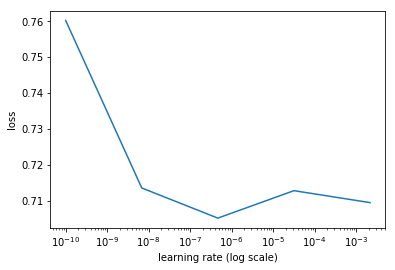

In [242]:
m.sched.plot(0, 0)

In [246]:
lr=1e-3

In [247]:
m.fit(lr, 3, metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.825029   0.630845   0.741573  
    1      0.680571   0.638607   0.735955                                                                              
    2      0.61218    0.528311   0.775281                                                                              



[array([0.52831]), 0.7752808928489685]

In [248]:
m.fit(lr, 3, metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.519053   0.466376   0.803371  
    1      0.468514   0.471858   0.797753                                                                              
    2      0.456449   0.468325   0.786517                                                                              



[array([0.46833]), 0.7865168452262878]

In [249]:
m.fit(lr, 3, cycle_len=4, metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.435798   0.486234   0.803371  
    1      0.431402   0.479687   0.775281                                                                              
    2      0.417451   0.449927   0.803371                                                                              
    3      0.407826   0.447905   0.803371                                                                              
    4      0.402633   0.458732   0.803371                                                                              
    5      0.399797   0.455965   0.792135                                                                              
    6      0.397392   0.450793   0.808989                                                                              
    7      0.391981   0.449846   0.803371                                                                           

[array([0.4637]), 0.8033707737922668]

In [223]:
m.fit(lr, 3, cycle_len=4, metrics=[accuracy])

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.442194   0.505102   0.775281  
    1      0.431045   0.477322   0.786517                                                                              
    2      0.427349   0.431256   0.808989                                                                              
    3      0.420464   0.427955   0.820225                                                                              
    4      0.414463   0.44337    0.792135                                                                              
    5      0.413062   0.430126   0.814607                                                                              
    6      0.404122   0.440752   0.786517                                                                              
    7      0.397867   0.439904   0.780899                                                                           

[array([0.42991]), 0.8033707737922668]

In [175]:
m.crit

<function torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=True)>

In [250]:
y_pred,y_act=m.predict_with_targs()

In [251]:
np.unique(y_pred)

array([-5.21615, -4.72512, -4.51059, -4.37609, -4.33259, -4.18481, -4.09075, -4.0388 , -4.01634, -3.85391,
       -3.78148, -3.75464, -3.73663, -3.64728, -3.61069, -3.52357, -3.4879 , -3.47453, -3.44051, -3.41995,
       ..., -0.03326, -0.03257, -0.03147, -0.03104, -0.02994, -0.02741, -0.02641, -0.02412, -0.02369,
       -0.02305, -0.02142, -0.01818, -0.01778, -0.01687, -0.01534, -0.01322, -0.01265, -0.01105, -0.00891,
       -0.00544], dtype=float32)

In [252]:
accuracy_np(y_pred, y_act)

0.8033707865168539

In [260]:
pd.value_counts(np.argmax(y_pred, 1) == y_act)

True     143
False     35
dtype: int64

In [255]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, ..., 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [238]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(3, 2)
    (2): Embedding(8, 4)
    (3): Embedding(8, 4)
    (4): Embedding(4, 2)
  )
  (lins): ModuleList(
    (0): Linear(in_features=17, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=2, bias=True)
  (emb_drop): Dropout(p=0.04)
  (drops): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
  )
  (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True)
)

# TNT commit